In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
import os

In [2]:
# Get project root directory
if 'notebooks' in os.getcwd():
    project_root = Path.cwd().parent
else:
    project_root = Path.cwd()

data_dir = project_root / 'data'
raw_data_dir = data_dir / 'raw' 
processed_data_dir = data_dir / 'processed'
clusters_dir = processed_data_dir / 'clusters'

# Create directories if they don't exist
clusters_dir.mkdir(parents=True, exist_ok=True)

In [3]:

df = pd.read_csv(raw_data_dir / 'smart_meters_london_2013.csv')

df.head

<bound method NDFrame.head of                 timestamp      0      1      2      3      4      5      6  \
0     2013-01-01 00:00:00  0.460  3.888  0.000  0.207  0.000  0.451  0.962   
1     2013-01-01 01:00:00  0.426  2.603  0.158  0.106  0.000  0.375  1.121   
2     2013-01-01 02:00:00  0.411  2.159  0.000  0.069  0.000  0.312  0.373   
3     2013-01-01 03:00:00  0.395  2.040  0.170  0.065  0.000  0.199  0.421   
4     2013-01-01 04:00:00  0.221  1.495  0.000  0.058  0.000  0.096  0.303   
...                   ...    ...    ...    ...    ...    ...    ...    ...   
8755  2013-12-31 19:00:00  0.559  0.221  0.169  0.281  0.227  1.383  2.574   
8756  2013-12-31 20:00:00  1.233  0.140  0.000  0.286  0.218  0.643  2.589   
8757  2013-12-31 21:00:00  0.783  0.120  0.178  0.209  0.209  1.000  1.647   
8758  2013-12-31 22:00:00  0.858  0.484  0.000  0.467  0.154  0.732  1.476   
8759  2013-12-31 23:00:00  0.943  0.149  0.157  0.282  0.113  0.722  1.701   

          7      8  ...   4115   

In [4]:
df.set_index(df.columns[0], inplace=True)


print(df.head)
print("Original DataFrame:")
print(f"Number of rows: {len(df)}")
print(f"Number of columns: {len(df.columns)}")


<bound method NDFrame.head of                          0      1      2      3      4      5      6      7  \
timestamp                                                                     
2013-01-01 00:00:00  0.460  3.888  0.000  0.207  0.000  0.451  0.962  0.579   
2013-01-01 01:00:00  0.426  2.603  0.158  0.106  0.000  0.375  1.121  1.340   
2013-01-01 02:00:00  0.411  2.159  0.000  0.069  0.000  0.312  0.373  1.431   
2013-01-01 03:00:00  0.395  2.040  0.170  0.065  0.000  0.199  0.421  0.413   
2013-01-01 04:00:00  0.221  1.495  0.000  0.058  0.000  0.096  0.303  0.230   
...                    ...    ...    ...    ...    ...    ...    ...    ...   
2013-12-31 19:00:00  0.559  0.221  0.169  0.281  0.227  1.383  2.574  1.229   
2013-12-31 20:00:00  1.233  0.140  0.000  0.286  0.218  0.643  2.589  1.314   
2013-12-31 21:00:00  0.783  0.120  0.178  0.209  0.209  1.000  1.647  0.906   
2013-12-31 22:00:00  0.858  0.484  0.000  0.467  0.154  0.732  1.476  0.775   
2013-12-31 23:00:00  0

In [5]:
extract_date = []
extract_time = []

for index in df.index:
    date, time = index.split()
    extract_date.append(date)
    extract_time.append(time)

In [6]:
df.index = extract_date
df['Time'] = extract_time


In [7]:
def detect_season(num):
    if isinstance(num, str):
        num = int(num)
    if num in [12, 1, 2]:
        return 'Winter'
    elif num in [3, 4, 5]:
        return 'Spring'
    elif num in [6, 7, 8]:
        return 'Summer'
    elif num in [9, 10, 11]:
        return 'Fall'


In [8]:
seasons_array = []

for index in df.index:
    print(index)
    date = index.split('-')[1]
    print(date)
    seasons_array.append(detect_season(date))

# This adds a new column named 'Season' to the dataframe df, 
# using the values from seasons_array as the column data
df['Season'] = seasons_array

2013-01-01
01
2013-01-01
01
2013-01-01
01
2013-01-01
01
2013-01-01
01
2013-01-01
01
2013-01-01
01
2013-01-01
01
2013-01-01
01
2013-01-01
01
2013-01-01
01
2013-01-01
01
2013-01-01
01
2013-01-01
01
2013-01-01
01
2013-01-01
01
2013-01-01
01
2013-01-01
01
2013-01-01
01
2013-01-01
01
2013-01-01
01
2013-01-01
01
2013-01-01
01
2013-01-01
01
2013-01-02
01
2013-01-02
01
2013-01-02
01
2013-01-02
01
2013-01-02
01
2013-01-02
01
2013-01-02
01
2013-01-02
01
2013-01-02
01
2013-01-02
01
2013-01-02
01
2013-01-02
01
2013-01-02
01
2013-01-02
01
2013-01-02
01
2013-01-02
01
2013-01-02
01
2013-01-02
01
2013-01-02
01
2013-01-02
01
2013-01-02
01
2013-01-02
01
2013-01-02
01
2013-01-02
01
2013-01-03
01
2013-01-03
01
2013-01-03
01
2013-01-03
01
2013-01-03
01
2013-01-03
01
2013-01-03
01
2013-01-03
01
2013-01-03
01
2013-01-03
01
2013-01-03
01
2013-01-03
01
2013-01-03
01
2013-01-03
01
2013-01-03
01
2013-01-03
01
2013-01-03
01
2013-01-03
01
2013-01-03
01
2013-01-03
01
2013-01-03
01
2013-01-03
01
2013-01-03
01
2013-0

In [9]:
print(seasons_array)

['Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter',

In [10]:
print(df[['Season', 'Time']])

            Season      Time
2013-01-01  Winter  00:00:00
2013-01-01  Winter  01:00:00
2013-01-01  Winter  02:00:00
2013-01-01  Winter  03:00:00
2013-01-01  Winter  04:00:00
...            ...       ...
2013-12-31  Winter  19:00:00
2013-12-31  Winter  20:00:00
2013-12-31  Winter  21:00:00
2013-12-31  Winter  22:00:00
2013-12-31  Winter  23:00:00

[8760 rows x 2 columns]


In [11]:
# Convert index to datetime if not already
df.index = pd.to_datetime(df.index)

# Resample by day and take mean, excluding non-numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df_daily = df[numeric_cols].resample('D').mean()

# Add back the Season column
df_daily['Season'] = df['Season'].resample('D').first()
# Add back the Time column
df_daily['Time'] = df['Time'].resample('D').first()

print(df[['Season', 'Time']])






            Season      Time
2013-01-01  Winter  00:00:00
2013-01-01  Winter  01:00:00
2013-01-01  Winter  02:00:00
2013-01-01  Winter  03:00:00
2013-01-01  Winter  04:00:00
...            ...       ...
2013-12-31  Winter  19:00:00
2013-12-31  Winter  20:00:00
2013-12-31  Winter  21:00:00
2013-12-31  Winter  22:00:00
2013-12-31  Winter  23:00:00

[8760 rows x 2 columns]


In [12]:
print("Original DataFrame:")
print(f"Number of rows: {len(df)}")
print(f"Number of columns: {len(df.columns)}")
print("\nDaily Resampled DataFrame:")
print(f"Number of rows: {len(df_daily)}")
print(f"Number of columns: {len(df_daily.columns)}")


Original DataFrame:
Number of rows: 8760
Number of columns: 4127

Daily Resampled DataFrame:
Number of rows: 365
Number of columns: 4127


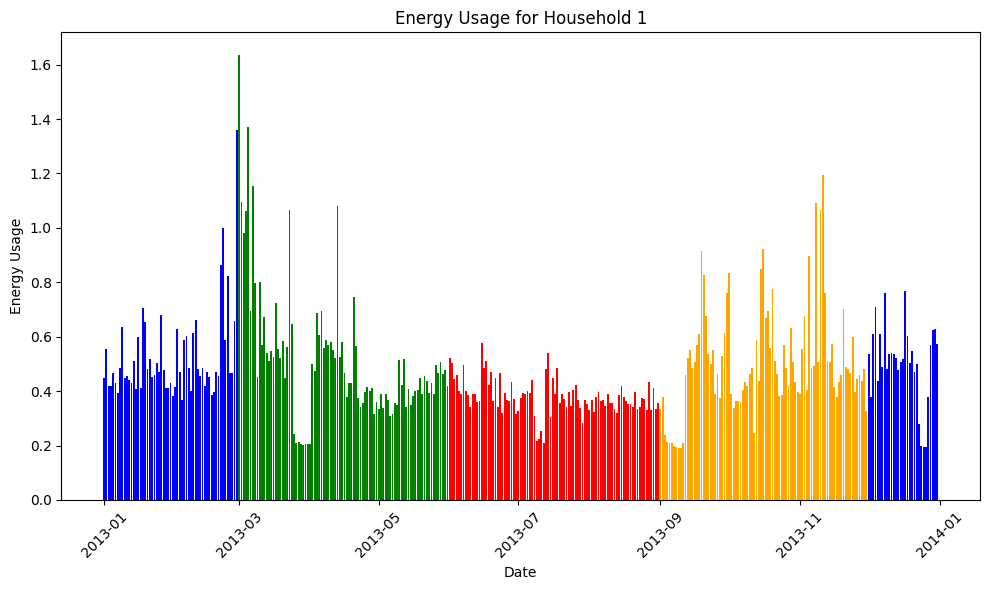

In [13]:
for household in range(1):
    plt.figure(figsize=(10,6))
    colors = {'Winter': 'blue', 'Spring': 'green', 'Summer': 'red', 'Fall': 'orange'}
    plt.bar(df_daily.index, df_daily.iloc[:,household], color=[colors[season] for season in df_daily['Season']])
    plt.xticks(rotation=45)
    plt.title(f'Energy Usage for Household {household+1}')
    plt.xlabel('Date')
    plt.ylabel('Energy Usage')
    plt.tight_layout()
    plt.show()

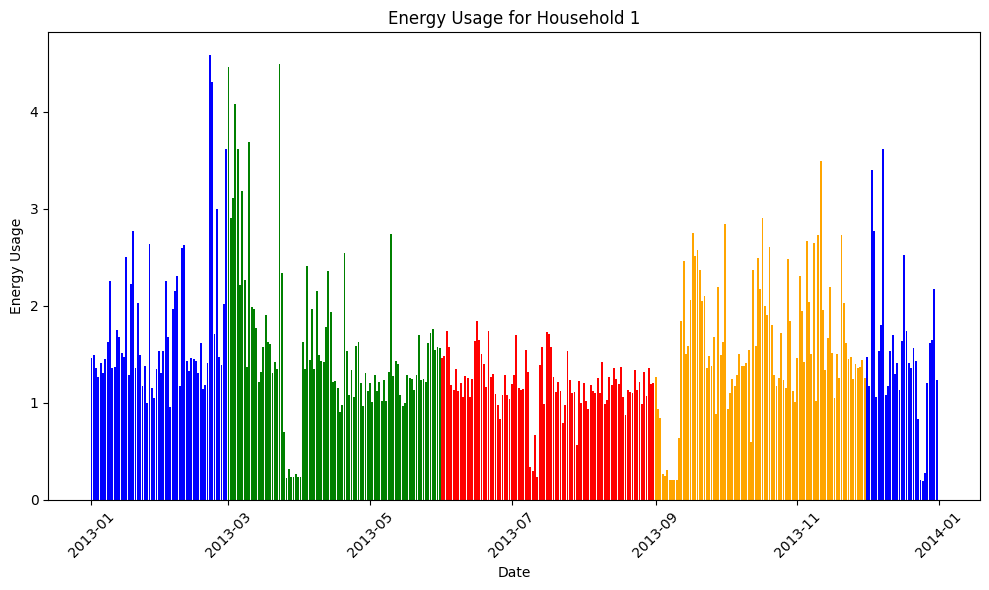

In [14]:
for household in range(1):
    plt.figure(figsize=(10,6))
    colors = {'Winter': 'blue', 'Spring': 'green', 'Summer': 'red', 'Fall': 'orange'}
    plt.bar(df.index, df.iloc[:,household], color=[colors[season] for season in df['Season']])
    plt.xticks(rotation=45)
    plt.title(f'Energy Usage for Household {household+1}')
    plt.xlabel('Date')
    plt.ylabel('Energy Usage')
    plt.tight_layout()
    plt.show()

In [15]:
# Create feature dataframe with initial columns
features_dict = {}

# Get numeric columns (excluding Season and Time)
numeric_cols = df.columns.difference(['Season', 'Time'])

# Filter data by season
seasonal_data = {
    'Winter': df[df['Season'] == 'Winter'],
    'Spring': df[df['Season'] == 'Spring'], 
    'Summer': df[df['Season'] == 'Summer'],
    'Fall': df[df['Season'] == 'Fall']
}

# Calculate seasonal statistics for each household
for household in numeric_cols:
    features = []
    for season, season_df in seasonal_data.items():
        mean = season_df[household].mean()
        median = season_df[household].median()
        std = season_df[household].std()
        peak = season_df[household].max()
        
        features.extend([mean, median, std, peak])

    # Calculate seasonal ratios
    winter_mean = seasonal_data['Winter'][household].mean()
    spring_mean = seasonal_data['Spring'][household].mean() 
    summer_mean = seasonal_data['Summer'][household].mean()
    fall_mean = seasonal_data['Fall'][household].mean()

    winter_summer = winter_mean / summer_mean if summer_mean != 0 else 0
    winter_spring = winter_mean / spring_mean if spring_mean != 0 else 0
    summer_fall = summer_mean / fall_mean if fall_mean != 0 else 0
    
    features.extend([winter_summer, winter_spring, summer_fall])
    
    features_dict[household] = features

# Create the final DataFrame with households as columns
df_features = pd.DataFrame(features_dict)

In [16]:
print(df_features.shape)
print(df.shape)

(19, 4125)
(8760, 4127)


In [17]:
# K-menas clustering 23


from sklearn.cluster import KMeans

# Transpose the DataFrame to get vectors as rows (4125 samples, 19 features)
data = df_features.T  # Now shape is (4125, 19)

# Perform K-means clustering
kmeans = KMeans(n_clusters=23, random_state=0, n_init=10)  # Explicitly set n_init to suppress warning
kmeans.fit(data)

# Get cluster labels for each vector (0 to 22)
labels = kmeans.labels_

# Map cluster IDs to original indices in df_features (column indices)
clusters = {i: [] for i in range(23)}
for idx, label in enumerate(labels):
    clusters[label].append(idx)  # idx is the original column index in df_features

# Example: Access indices in cluster 0
print("Indices in Cluster 0:", clusters[0])

Indices in Cluster 0: [79, 382, 403, 481, 658, 672, 751, 845, 946, 996, 1224, 1236, 1963, 2183, 2260, 2311, 2418, 2510, 2629, 2743, 2875, 2888, 2893, 2894, 2895, 2964, 2986, 3014, 3239, 3315, 3320, 3329, 3672, 3791, 3923, 3967]


In [18]:
import pandas as pd

# Remove last two rows from df (new shape: 8758, 4127)
df_reduced = df.iloc[:-2, :]  # Keep all columns but remove last 2 rows

# Create new clusters dictionary with vectors instead of indices
clusters_with_vectors = {cluster_id: [] for cluster_id in range(23)}

for cluster_id, indices in clusters.items():
    # Get corresponding vectors from reduced dataframe
    clusters_with_vectors[cluster_id] = [df_reduced.iloc[:, idx] for idx in indices]

# Verify:
print(f"Cluster 0 contains {len(clusters_with_vectors[0])} vectors")
print(f"First vector in Cluster 0 shape: {clusters_with_vectors[0][0].shape}  # Should be (8758,)")

Cluster 0 contains 36 vectors
First vector in Cluster 0 shape: (8758,)  # Should be (8758,)


In [19]:
import json

# Convert clusters_with_vectors to JSON-serializable format
clusters_json = {
    str(cluster_id): [vector.tolist() for vector in vectors]
    for cluster_id, vectors in clusters_with_vectors.items()
}

# Save to file
with open(processed_data_dir / "feature_extraction_cluster_23.json", "w") as f:
    json.dump(clusters_json, f)

# Verify structure
print(f"Cluster 0 has {len(clusters_json['0'])} vectors")
print(f"First vector in Cluster 0 length: {len(clusters_json['0'][0])}")  # Should be 8758

Cluster 0 has 36 vectors
First vector in Cluster 0 length: 8758


In [21]:
os.chdir(os.path.dirname(os.getcwd()))

In [22]:
from src.data_processing import validate_cluster_data

project_root = Path.cwd().parent if 'notebooks' in os.getcwd() else Path.cwd()
cluster_file = project_root / 'data' / 'processed' / 'feature_extraction_cluster_23.json'
raw_file = project_root / 'data' / 'raw' / 'smart_meters_london_2013.csv'

matches = validate_cluster_data(cluster_file, raw_file)
print(f"Validation matches: {matches}")

Number of matching vectors: 0
Validation matches: 0


In [ ]:
# K-menas clustering 103



# Transpose the DataFrame to have vectors as rows (samples)
X = df_features.T  # Now shape (4125, 19)

# Initialize KMeans with 103 clusters
kmeans = KMeans(n_clusters=103, random_state=0)
kmeans.fit(X)

# Get cluster labels for each vector (row in X)
labels = kmeans.labels_  # Shape (4125,)

# Create a dictionary mapping cluster IDs to original indices
cluster_to_indices = {i: [] for i in range(103)}
for idx, label in enumerate(labels):
    cluster_to_indices[label].append(idx)

# Example: Get all original indices in cluster 0
print(cluster_to_indices[0])

[30, 318, 585, 2263, 2884, 3503, 3550, 3640]


In [ ]:
import pandas as pd

# Trim the last two rows from df
df_trimmed = df.iloc[:-2, :]  # New shape: (8758, 4127)

# Create a dictionary to map clusters to trimmed vectors
cluster_to_vectors = {cluster_id: [] for cluster_id in cluster_to_indices.keys()}

for cluster_id, indices in cluster_to_indices.items():
    # Get vectors from df_trimmed using original indices
    cluster_vectors = [df_trimmed.iloc[:, idx].values for idx in indices]
    cluster_to_vectors[cluster_id] = cluster_vectors

# Verify the output
print(f"Trimmed DataFrame shape: {df_trimmed.shape}")
print(f"Vectors in cluster 0: {len(cluster_to_vectors[0])} vectors")
print(f"Each vector shape: {cluster_to_vectors[0][0].shape}")

Trimmed DataFrame shape: (8758, 4127)
Vectors in cluster 0: 8 vectors
Each vector shape: (8758,)


In [ ]:
import json

# Convert clusters_with_vectors to JSON-serializable format
clusters_json = {
    str(cluster_id): [vector.tolist() for vector in vectors]
    for cluster_id, vectors in clusters_with_vectors.items()
}


# Save to file
with open(processed_data_dir / "feature_extraction_cluster_103.json", "w") as f:
    json.dump(clusters_json, f)

# Verify structure
print(f"Cluster 0 has {len(clusters_json['0'])} vectors")
print(f"First vector in Cluster 0 length: {len(clusters_json['0'][0])}")  # Should be 8758

Cluster 0 has 36 vectors
First vector in Cluster 0 length: 8758
